In [499]:
!pip install nltk
!pip3 install swifter
!pip3 install PySastrawi

In [500]:
import pandas as pd # Pandas dapat membaca file dari berbagai format seperti .txt, .csv, .tsv, dan lainnya
import numpy as np
import matplotlib.pyplot as plt
import pickle
import re # ekspresi reguler adalah urutan karakter khusus yang membantu mencocokkan atau menemukan string atau kumpulan string lain
import string
import nltk # libray python untuk bekerja dengan permodelan teks
nltk.download('punkt')
nltk.download('stopwords')

%matplotlib inline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [501]:
!pip install sastrawi

In [502]:
from google.colab import files
uploades = files.upload()

Saving dataset-ban.csv to dataset-ban.csv


In [503]:
data = pd.read_csv("dataset-ban.csv")
data.head(200)

,Dokumen,Deskripsi
0,d1,Ban ini aus karena mengalami kerusakan dan sud...
1,d2,Ban ini aus karena sudah dibawah panah twi dan...
2,d3,Ban ini menunjukkan tanda keausan yang signifi...
3,d4,Ban ini telah mencapai masa pakainya yang maks...
4,d5,Ban tersebut terlihat aus dengan pola kembang ...
...,...,...
195,d196,Ban ini berada dalam kondisi normal dengan uku...
196,d197,Ban ini tetap normal dengan ukuran ban 215I60 ...
197,d198,Ban ini masih dalam kondisi normal dengan ukur...
198,d199,Ban ini dalam kondisi normal dan masih baru. T...


In [504]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Dokumen    200 non-null    object
 1   Deskripsi  200 non-null    object
dtypes: object(2)
memory usage: 3.2+ KB


In [505]:
#Casefolding

import re

#fungsi untuk langkah case folding
def casefolding(text):
  text = text.lower()                                    #mengubah teks menjadi lower case
  text = re.sub(r'https?://\S+|www\.\s+', ' ', text)     #menghapus URL
  #text = re.sub(r'[-+]?[0-9]+', ' ', text)               #menghapus angka
  text = re.sub(r'[^\w\s]', ' ', text)                   #menghapus karakter tanda baca
  #text = re.sub(r'[^/\w\s]|(?<!/)/(?!/)', '', text)       # Menghapus karakter tanda baca kecuali "/", angka 0-9, dan whitespace
  text = text.strip()
  return text

In [506]:
data_awal = data['Deskripsi'].iloc[0]
case_folding = casefolding(data_awal)

print('Data awal\t: ', data_awal)
print('Case folding\t: ', case_folding)

Data awal	:  Ban ini aus karena mengalami kerusakan dan sudah tipis, terdapat retakan sobekan kecil, yang kemungkinan disebabkan oleh penggunaan ban yang sudah tua dan sering digunakan di cuaca panas, serta minimnya perawatan yang dilakukan.
Case folding	:  ban ini aus karena mengalami kerusakan dan sudah tipis  terdapat retakan sobekan kecil  yang kemungkinan disebabkan oleh penggunaan ban yang sudah tua dan sering digunakan di cuaca panas  serta minimnya perawatan yang dilakukan


In [507]:
#tokenize

from nltk.tokenize import word_tokenize

def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens

In [508]:
data_awal = data['Deskripsi'].iloc[0]
case_folding = casefolding(data_awal)
text_tokenize = tokenize_text(case_folding)

print('Data awal\t: ', data_awal)
print('Case folding\t: ', case_folding)
print('Tokenize\t: ', text_tokenize)

Data awal	:  Ban ini aus karena mengalami kerusakan dan sudah tipis, terdapat retakan sobekan kecil, yang kemungkinan disebabkan oleh penggunaan ban yang sudah tua dan sering digunakan di cuaca panas, serta minimnya perawatan yang dilakukan.
Case folding	:  ban ini aus karena mengalami kerusakan dan sudah tipis  terdapat retakan sobekan kecil  yang kemungkinan disebabkan oleh penggunaan ban yang sudah tua dan sering digunakan di cuaca panas  serta minimnya perawatan yang dilakukan
Tokenize	:  ['ban', 'ini', 'aus', 'karena', 'mengalami', 'kerusakan', 'dan', 'sudah', 'tipis', 'terdapat', 'retakan', 'sobekan', 'kecil', 'yang', 'kemungkinan', 'disebabkan', 'oleh', 'penggunaan', 'ban', 'yang', 'sudah', 'tua', 'dan', 'sering', 'digunakan', 'di', 'cuaca', 'panas', 'serta', 'minimnya', 'perawatan', 'yang', 'dilakukan']


In [509]:
#NORMALISASI

#corpus kumpulan slangwords dari github

!wget https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv

--2023-12-13 12:15:08--  https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80969 (79K) [text/plain]
Saving to: ‘key_norm.csv’

key_norm.csv        100%[===================>]  79.07K  --.-KB/s    in 0.03s   

2023-12-13 12:15:08 (2.95 MB/s) - ‘key_norm.csv’ saved [80969/80969]



In [510]:
key_norm = pd.read_csv('key_norm.csv')
print(key_norm.head())

key_norm.shape

   _id      singkat       hasil
0    1         abis       habis
1    2       accent     tekanan
2    3       accept      terima
3    4     accident  kecelakaan
4    5  achievement    prestasi


(3720, 3)

In [511]:

def textnormalize(text):
    normalized_text = ' '.join([key_norm[key_norm['singkat'] == word]['hasil'].values[0] if (key_norm['singkat'] == word).any() else word for word in text])
    normalized_text = str.lower(normalized_text)
    return normalized_text


In [512]:
data_awal = data['Deskripsi'].iloc[0]
case_folding = casefolding(data_awal)
text_tokenize = tokenize_text(case_folding)
text_normalize = textnormalize(text_tokenize)

print('Data awal\t: ', data_awal)
print('Case folding\t: ', case_folding)
print('Tokenize\t: ', text_tokenize)
print('Normalisasi\t: ', text_normalize)

Data awal	:  Ban ini aus karena mengalami kerusakan dan sudah tipis, terdapat retakan sobekan kecil, yang kemungkinan disebabkan oleh penggunaan ban yang sudah tua dan sering digunakan di cuaca panas, serta minimnya perawatan yang dilakukan.
Case folding	:  ban ini aus karena mengalami kerusakan dan sudah tipis  terdapat retakan sobekan kecil  yang kemungkinan disebabkan oleh penggunaan ban yang sudah tua dan sering digunakan di cuaca panas  serta minimnya perawatan yang dilakukan
Tokenize	:  ['ban', 'ini', 'aus', 'karena', 'mengalami', 'kerusakan', 'dan', 'sudah', 'tipis', 'terdapat', 'retakan', 'sobekan', 'kecil', 'yang', 'kemungkinan', 'disebabkan', 'oleh', 'penggunaan', 'ban', 'yang', 'sudah', 'tua', 'dan', 'sering', 'digunakan', 'di', 'cuaca', 'panas', 'serta', 'minimnya', 'perawatan', 'yang', 'dilakukan']
Normalisasi	:  ban ini aus karena mengalami kerusakan dan sudah tipis terdapat retakan sobekan kecil yang kemungkinan disebabkan oleh penggunaan ban yang sudah tua dan sering di

In [513]:
#filtering (stopword removal)

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

stopwords_ind = stopwords.words('indonesian')

In [514]:
len(stopwords_ind)

758

In [515]:
#daftar stopword yang disediakan NLTK
stopwords_ind[:10]

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir']

In [516]:
#fungsi untuk langkah stopword removal

more_stopword = ['aus', 'ini', 'karena', 'sudah', 'dan', 'dapat',
                 'yang', 'oleh', 'sebab', 'guna', 'di',
                 'serta', 'nya', 'dengan', 'pada', 'selain',
                 'itu', 'juga', 'jadi', 'setelah', 'dalam',
                 'kini', 'dulu', 'telah', 'bahkan', 'akibat',
                 'tersebut', 'sebut', 'tidak', 'ketika', 'atau',
                 'ke', 'terhadap', 'sehingga', 'hingga', 'bagian', 'secara',
                 'hal', 'saat', 'manuver', 'medan', 'sedangkan', 'mungkin',
                 'bahwa', 'perlu', 'bisa', 'segera', 'saat', 'adalah',
                 'daya', 'merek', 'untuk', 'umur', 'zat', 'lainnya',
                 'lain', 'rasa', 'kord', 'benjolan', 'lihat', 'kontak',
                 'seperti', 'serius', 'lewat', 'mencurigakan', 'curiga',
                 'tanpa', 'panah', 'r', 'kondisi', 'ban', 'keausan',
                 'normal']        #tambah kata lain dalam daftar stopword
stopwords_ind = stopwords_ind + more_stopword

def remove_stop_words(text):
  clean_words = []
  text = text.split()
  for word in text:
    if word.lower() not in stopwords_ind:
      clean_words.append(word)
  return " ".join(clean_words)

In [517]:
data_awal = data['Deskripsi'].iloc[1]
case_folding = casefolding(data_awal)
text_tokenize = tokenize_text(case_folding)
text_normalize = textnormalize(text_tokenize)
stopword_removal =  remove_stop_words(text_normalize)

print('Data awal\t\t: ', data_awal)
print('Case folding\t\t: ', case_folding)
print('Tokenize\t\t: ', text_tokenize)
print('Normalisasi\t\t: ', text_normalize)
print('Stopword removal\t: ', stopword_removal)

Data awal		:  Ban ini aus karena sudah dibawah panah twi dan mengalami kerusakan yang cukup parah dengan adanya banyak sobekan kecil pada tekstur tapaknya. Selain itu, warna ban juga terlihat sudah berubah menjadi pudar, menunjukkan tanda penggunaan yang intensif dan kurangnya perawatan yang diperlukan.
Case folding		:  ban ini aus karena sudah dibawah panah twi dan mengalami kerusakan yang cukup parah dengan adanya banyak sobekan kecil pada tekstur tapaknya  selain itu  warna ban juga terlihat sudah berubah menjadi pudar  menunjukkan tanda penggunaan yang intensif dan kurangnya perawatan yang diperlukan
Tokenize		:  ['ban', 'ini', 'aus', 'karena', 'sudah', 'dibawah', 'panah', 'twi', 'dan', 'mengalami', 'kerusakan', 'yang', 'cukup', 'parah', 'dengan', 'adanya', 'banyak', 'sobekan', 'kecil', 'pada', 'tekstur', 'tapaknya', 'selain', 'itu', 'warna', 'ban', 'juga', 'terlihat', 'sudah', 'berubah', 'menjadi', 'pudar', 'menunjukkan', 'tanda', 'penggunaan', 'yang', 'intensif', 'dan', 'kurangny

In [518]:
#stemming

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.Stemmer.Context.Visitor.VisitorProvider import VisitorProvider

factory = StemmerFactory()
stemmer = factory.create_stemmer()

#stemming aturan khusus
custom_dictionary = {
    'kerusakan': 'rusak',
    'retakan': 'retak',
    'perawatan': 'rawat',
    'rawat': 'rawat'
}

#fungsi untuk langkah stemming bahasa indonesia
def stemming(text):
    stemmed_words = []
    text = text.split()
    for word in text:
        if word in custom_dictionary:
            stemmed_word = custom_dictionary[word]
        else:
            stemmed_word = stemmer.stem(word)
        stemmed_words.append(stemmed_word)
    text = ' '.join(stemmed_words)
    return text

In [519]:
data_awal = data['Deskripsi'].iloc[0]
case_folding = casefolding(data_awal)
text_tokenize = tokenize_text(case_folding)
text_normalize = textnormalize(text_tokenize)
stopword_removal =  remove_stop_words(text_normalize)
text_stemming = stemming(stopword_removal)

print('Data awal\t\t: ', data_awal)
print('Case folding\t\t: ', case_folding)
print('Tokenize\t\t: ', text_tokenize)
print('Normalisasi\t\t: ', text_normalize)
print('Stopword removal\t: ', stopword_removal)
print('Stemming\t\t: ', text_stemming)

Data awal		:  Ban ini aus karena mengalami kerusakan dan sudah tipis, terdapat retakan sobekan kecil, yang kemungkinan disebabkan oleh penggunaan ban yang sudah tua dan sering digunakan di cuaca panas, serta minimnya perawatan yang dilakukan.
Case folding		:  ban ini aus karena mengalami kerusakan dan sudah tipis  terdapat retakan sobekan kecil  yang kemungkinan disebabkan oleh penggunaan ban yang sudah tua dan sering digunakan di cuaca panas  serta minimnya perawatan yang dilakukan
Tokenize		:  ['ban', 'ini', 'aus', 'karena', 'mengalami', 'kerusakan', 'dan', 'sudah', 'tipis', 'terdapat', 'retakan', 'sobekan', 'kecil', 'yang', 'kemungkinan', 'disebabkan', 'oleh', 'penggunaan', 'ban', 'yang', 'sudah', 'tua', 'dan', 'sering', 'digunakan', 'di', 'cuaca', 'panas', 'serta', 'minimnya', 'perawatan', 'yang', 'dilakukan']
Normalisasi		:  ban ini aus karena mengalami kerusakan dan sudah tipis terdapat retakan sobekan kecil yang kemungkinan disebabkan oleh penggunaan ban yang sudah tua dan serin

In [520]:
#fungsi unruk menggabungkan seluruh langkah preprocessing

def text_preprocessing_process(text):
  text = casefolding(text)
  text = tokenize_text(text)
  text = textnormalize(text)
  text = remove_stop_words(text)
  text = stemming(text)
  return text

In [521]:
#waktu komputasi ketika proses text processing
%%time
data['clean_teks'] = data['Deskripsi'].apply(text_preprocessing_process)


CPU times: user 19.7 s, sys: 79 ms, total: 19.8 s
Wall time: 27.2 s


In [522]:
data

,Dokumen,Deskripsi,clean_teks
0,d1,Ban ini aus karena mengalami kerusakan dan sud...,alami rusak tipis retak sobek sebab guna tua c...
1,d2,Ban ini aus karena sudah dibawah panah twi dan...,bawah twi alami rusak parah sobek tekstur tapa...
2,d3,Ban ini menunjukkan tanda keausan yang signifi...,tanda signifikan pakai jalan jarak lewat kasar...
3,d4,Ban ini telah mencapai masa pakainya yang maks...,capai pakai maksimal tapak halus parah
4,d5,Ban tersebut terlihat aus dengan pola kembang ...,pola kembang kikis atur jalan basah cengkeram ...
...,...,...,...
195,d196,Ban ini berada dalam kondisi normal dengan uku...,ukur 195i65 r15 twi tapak kasar tebal sesuai
196,d197,Ban ini tetap normal dengan ukuran ban 215I60 ...,ukur 215i60 r16 twi tapak mulus tebal bagus
197,d198,Ban ini masih dalam kondisi normal dengan ukur...,ukur 185i55 r15 twi tapak kasar tebal cukup
198,d199,Ban ini dalam kondisi normal dan masih baru. T...,bulu karet tapak jarak twi tapak alur pola kem...


In [523]:
#simpan data agar tidak menjalankan proses ulang
data.to_csv('clean_data.csv')

In [524]:
data = pd.read_csv('clean_data.csv')

In [525]:
data

,Unnamed: 0,Dokumen,Deskripsi,clean_teks
0,0,d1,Ban ini aus karena mengalami kerusakan dan sud...,alami rusak tipis retak sobek sebab guna tua c...
1,1,d2,Ban ini aus karena sudah dibawah panah twi dan...,bawah twi alami rusak parah sobek tekstur tapa...
2,2,d3,Ban ini menunjukkan tanda keausan yang signifi...,tanda signifikan pakai jalan jarak lewat kasar...
3,3,d4,Ban ini telah mencapai masa pakainya yang maks...,capai pakai maksimal tapak halus parah
4,4,d5,Ban tersebut terlihat aus dengan pola kembang ...,pola kembang kikis atur jalan basah cengkeram ...
...,...,...,...,...
195,195,d196,Ban ini berada dalam kondisi normal dengan uku...,ukur 195i65 r15 twi tapak kasar tebal sesuai
196,196,d197,Ban ini tetap normal dengan ukuran ban 215I60 ...,ukur 215i60 r16 twi tapak mulus tebal bagus
197,197,d198,Ban ini masih dalam kondisi normal dengan ukur...,ukur 185i55 r15 twi tapak kasar tebal cukup
198,198,d199,Ban ini dalam kondisi normal dan masih baru. T...,bulu karet tapak jarak twi tapak alur pola kem...


In [526]:
def word_tokenize_wrapper(text):
  return word_tokenize(text)
data['Deskripsi_tokens'] = data['clean_teks'].apply(word_tokenize_wrapper)

In [527]:
data_awal = str(data['clean_teks'].iloc[5])
text_tokenize = word_tokenize_wrapper(data_awal)

print('Data awal\t: ', data_awal)
print('Tokenize\t: ', text_tokenize)

Data awal	:  tanda rata tapak lapis karet tipis lapis ikat
Tokenize	:  ['tanda', 'rata', 'tapak', 'lapis', 'karet', 'tipis', 'lapis', 'ikat']


In [528]:
(data['Deskripsi_tokens'].head())

0    [alami, rusak, tipis, retak, sobek, sebab, gun...
1    [bawah, twi, alami, rusak, parah, sobek, tekst...
2    [tanda, signifikan, pakai, jalan, jarak, lewat...
3        [capai, pakai, maksimal, tapak, halus, parah]
4    [pola, kembang, kikis, atur, jalan, basah, cen...
Name: Deskripsi_tokens, dtype: object

In [529]:
#NLTK clac frequency distribution
from nltk.probability import FreqDist
def freqDist_wrapper(text):
  return FreqDist(text)
data['Kata Dominan'] = data['Deskripsi_tokens'].apply(freqDist_wrapper)

print('Frequency Tokens : \n')
print(data['Kata Dominan'].head(100).apply(lambda x : x.most_common()))

Frequency Tokens : 

0     [(alami, 1), (rusak, 1), (tipis, 1), (retak, 1...
1     [(bawah, 1), (twi, 1), (alami, 1), (rusak, 1),...
2     [(tanda, 1), (signifikan, 1), (pakai, 1), (jal...
3     [(capai, 1), (pakai, 1), (maksimal, 1), (tapak...
4     [(pola, 1), (kembang, 1), (kikis, 1), (atur, 1...
                            ...                        
95    [(tanda, 2), (tapak, 2), (deformasi, 2), (halu...
96    [(retak, 4), (tapak, 2), (halus, 1), (licin, 1...
97    [(tanda, 3), (rusak, 3), (tapak, 2), (halus, 1...
98    [(bercak, 6), (licin, 3), (tapak, 2), (kendara...
99    [(gores, 6), (tapak, 2), (halus, 1), (kilap, 1...
Name: Kata Dominan, Length: 100, dtype: object


In [530]:
#gabung deskripsi ban
teks_total = ' '.join(data['clean_teks'].iloc[:200])

In [531]:
tokens = word_tokenize(teks_total)

In [532]:
frekuensi = FreqDist(tokens)

In [533]:
for token, count in sorted(frekuensi.items(), key=lambda x: x[1], reverse=True):
    print(token, ":", count)

tapak : 250
pola : 85
twi : 84
tanda : 83
kembang : 72
kendara : 62
tebal : 61
ukur : 59
alur : 59
jarak : 58
awat : 45
karet : 42
r17 : 39
sebab : 35
warna : 34
halus : 33
kasar : 31
jaga : 29
rata : 28
jalan : 27
alami : 25
sesuai : 25
tajam : 24
signifikan : 22
bulu : 22
cukup : 21
rusak : 20
traksi : 20
pekat : 20
retak : 19
ukir : 19
mulus : 19
kurang : 18
guna : 17
pengaruh : 17
ganti : 16
hilang : 15
gores : 15
performa : 15
optimal : 15
parah : 14
cengkeram : 14
hitam : 14
serabut : 14
milik : 14
pakai : 13
capai : 13
rem : 13
batas : 13
kikis : 12
tingkat : 12
ubah : 11
tampil : 11
lapis : 10
licin : 10
bridgestone : 10
bercak : 10
pada : 10
turun : 9
tepi : 9
tekan : 9
usia : 9
dunlop : 9
sentuh : 9
sistem : 8
stabilitas : 8
r16 : 8
suspensi : 8
michelin : 8
indikator : 8
mampu : 7
aman : 7
r15 : 7
pirelli : 7
cepat : 7
bagus : 7
180i55 : 7
190i50 : 7
160i60 : 7
rawat : 6
lewat : 6
nyaman : 6
udara : 6
area : 6
banding : 6
200i55 : 6
tua : 5
kelupas : 5
kualitas : 5
bahan : 5

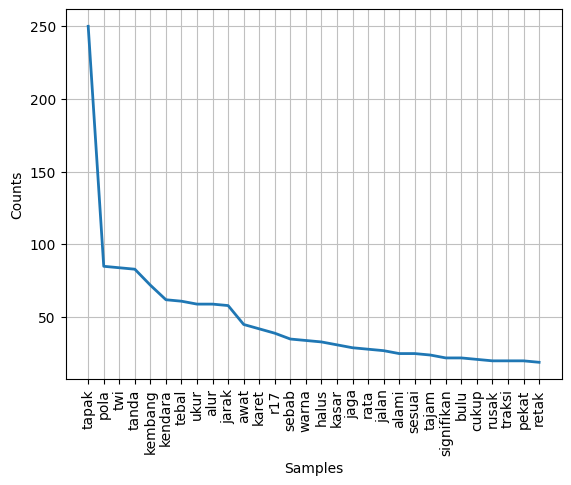

In [534]:
frekuensi.plot(30, cumulative=False)
plt.show()

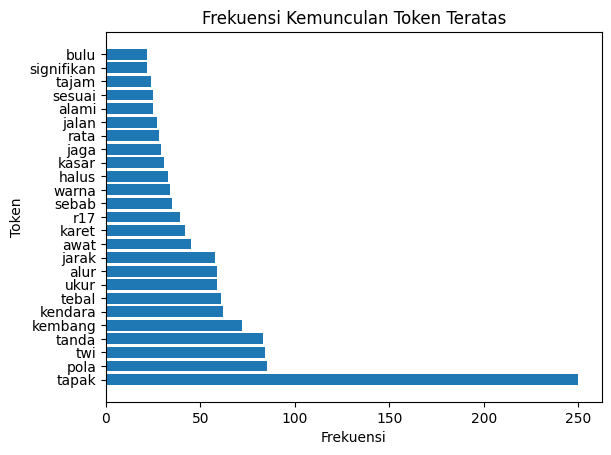

In [535]:
# Mengambil brp token dengan frekuensi tertinggi
top_tokens = frekuensi.most_common(25)

# Menyusun data untuk grafik
tokens = [token[0] for token in top_tokens]
counts = [token[1] for token in top_tokens]

# Menampilkan grafik diagram batang horizontal
plt.barh(tokens, counts)
plt.xlabel('Frekuensi')
plt.ylabel('Token')
plt.title('Frekuensi Kemunculan Token Teratas')
plt.show()

In [536]:
#gabung deskripsi ban aus
teks_total = ' '.join(data['clean_teks'].iloc[:100])

tokens = word_tokenize(teks_total)

frekuensi = FreqDist(tokens)

for token, count in sorted(frekuensi.items(), key=lambda x: x[1], reverse=True):
    print(token, ":", count)

tapak : 97
tanda : 79
kendara : 59
sebab : 35
halus : 33
pola : 30
rata : 28
alami : 24
jalan : 23
signifikan : 22
rusak : 20
karet : 20
retak : 19
kurang : 18
guna : 17
kembang : 17
pengaruh : 17
traksi : 17
ganti : 16
hilang : 15
gores : 15
parah : 14
serabut : 14
twi : 13
pakai : 13
capai : 13
rem : 13
batas : 13
warna : 12
kasar : 12
kikis : 12
tingkat : 12
cengkeram : 11
lapis : 10
performa : 10
licin : 10
ukur : 10
bercak : 10
turun : 9
tepi : 9
tekan : 9
usia : 9
jaga : 9
sentuh : 9
ubah : 8
sistem : 8
suspensi : 8
indikator : 8
mampu : 7
stabilitas : 7
cepat : 7
rawat : 6
lewat : 6
tajam : 6
optimal : 6
udara : 6
area : 6
banding : 6
tua : 5
kelupas : 5
bahan : 5
abu : 5
indikasi : 5
keras : 5
nyaman : 5
beban : 5
sesuai : 5
lebih : 5
aman : 5
ketidakseimbangan : 5
terang : 5
kilap : 5
tekstur : 4
risiko : 4
batu : 4
biasa : 4
kuat : 4
offroad : 4
hadap : 4
imbang : 4
alur : 4
tipis : 3
sobek : 3
cuaca : 3
intensif : 3
ekstrem : 3
tahan : 3
pecah : 3
lumpur : 3
kualitas : 3
efi

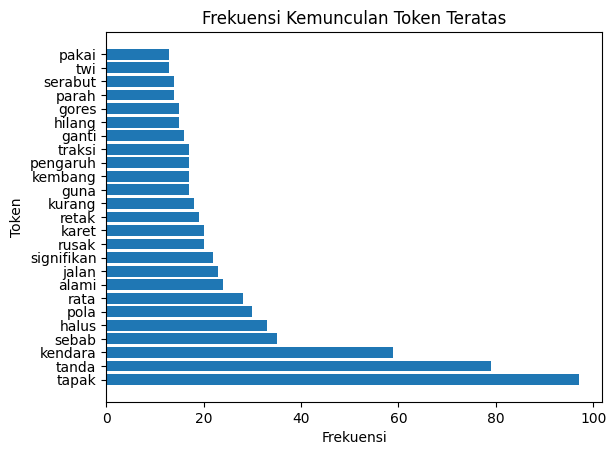

In [537]:
# Mengambil brp token dengan frekuensi tertinggi
top_tokens = frekuensi.most_common(25)

# Menyusun data untuk grafik
tokens = [token[0] for token in top_tokens]
counts = [token[1] for token in top_tokens]

# Menampilkan grafik diagram batang horizontal
plt.barh(tokens, counts)
plt.xlabel('Frekuensi')
plt.ylabel('Token')
plt.title('Frekuensi Kemunculan Token Teratas')
plt.show()

In [538]:
#gabung deskripsi ban aus
teks_total = ' '.join(data['clean_teks'].iloc[101:200])

tokens = word_tokenize(teks_total)

frekuensi = FreqDist(tokens)

for token, count in sorted(frekuensi.items(), key=lambda x: x[1], reverse=True):
    print(token, ":", count)

tapak : 152
twi : 71
tebal : 61
jarak : 56
pola : 55
kembang : 55
alur : 55
ukur : 49
awat : 45
r17 : 37
warna : 22
bulu : 22
karet : 22
cukup : 21
sesuai : 20
kasar : 19
jaga : 19
pekat : 19
ukir : 19
mulus : 19
tajam : 18
milik : 14
hitam : 12
tampil : 11
pada : 10
optimal : 8
bagus : 7
michelin : 7
180i55 : 7
bridgestone : 7
190i50 : 7
160i60 : 7
dunlop : 7
r16 : 6
pirelli : 6
200i55 : 6
performa : 5
r15 : 5
tanda : 4
170i60 : 4
metzeler : 4
jalan : 3
ubah : 3
cengkeram : 3
kendara : 3
195i65 : 3
215i60 : 3
irc : 3
150i70 : 3
andal : 2
traksi : 2
kualitas : 2
yakin : 2
aman : 2
205i55 : 2
225i50 : 2
185i55 : 2
standart : 2
internasional : 2
hadap : 1
alami : 1
tahan : 1
stabilitas : 1
jadi : 1
pilih : 1
percaya : 1
nyaman : 1
rapi : 1
195i60 : 1
205i50 : 1
225i55 : 1
r18 : 1


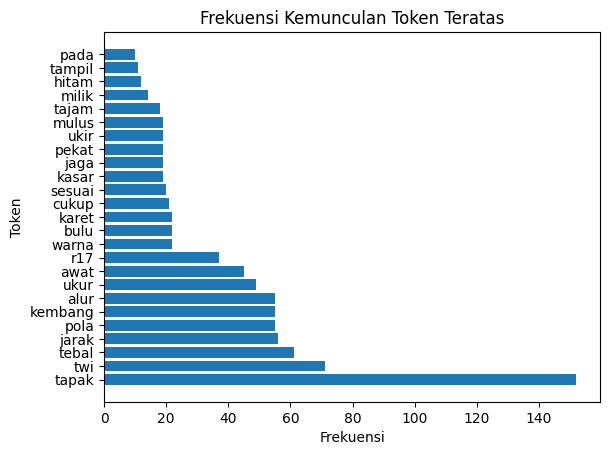

In [539]:
# Mengambil brp token dengan frekuensi tertinggi
top_tokens = frekuensi.most_common(25)

# Menyusun data untuk grafik
tokens = [token[0] for token in top_tokens]
counts = [token[1] for token in top_tokens]

# Menampilkan grafik diagram batang horizontal
plt.barh(tokens, counts)
plt.xlabel('Frekuensi')
plt.ylabel('Token')
plt.title('Frekuensi Kemunculan Token Teratas')
plt.show()

In [540]:
#import library wordcloud. wordcloud digunakan untuk melihat secara visual kata-kata yang paling sering muncul
#import library cv2 untuk mengolah gambar manjadi masking wourdcloud

import cv2
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [541]:
#download gammbbar masking dari github
!wget https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/img/cloud.jpg

--2023-12-13 12:15:44--  https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/img/cloud.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34396 (34K) [image/jpeg]
Saving to: ‘cloud.jpg’

cloud.jpg           100%[===================>]  33.59K  --.-KB/s    in 0.01s   

2023-12-13 12:15:44 (2.68 MB/s) - ‘cloud.jpg’ saved [34396/34396]



In [542]:
originalImage = cv2.imread('cloud.jpg')
grayImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)
(thresh, cloud_mask) = cv2.threshold(grayImage, 100, 225, cv2.THRESH_BINARY)

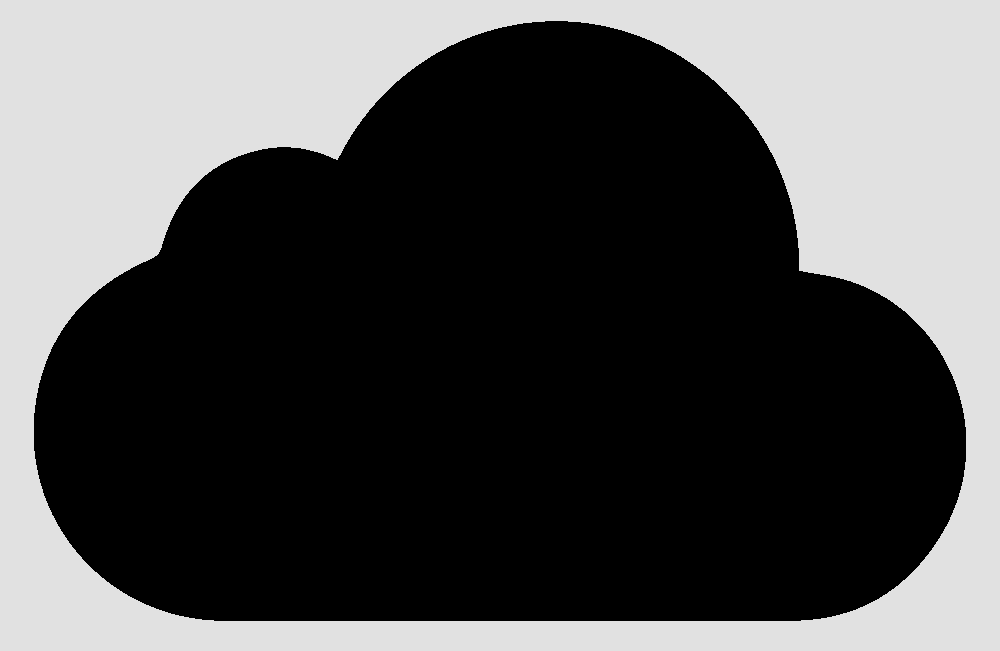

In [543]:
#TAMPILKAN MASKING
from google.colab.patches import cv2_imshow

cv2_imshow(cloud_mask)

In [544]:
data = pd.read_csv('clean_data.csv')

In [545]:
data

,Unnamed: 0,Dokumen,Deskripsi,clean_teks
0,0,d1,Ban ini aus karena mengalami kerusakan dan sud...,alami rusak tipis retak sobek sebab guna tua c...
1,1,d2,Ban ini aus karena sudah dibawah panah twi dan...,bawah twi alami rusak parah sobek tekstur tapa...
2,2,d3,Ban ini menunjukkan tanda keausan yang signifi...,tanda signifikan pakai jalan jarak lewat kasar...
3,3,d4,Ban ini telah mencapai masa pakainya yang maks...,capai pakai maksimal tapak halus parah
4,4,d5,Ban tersebut terlihat aus dengan pola kembang ...,pola kembang kikis atur jalan basah cengkeram ...
...,...,...,...,...
195,195,d196,Ban ini berada dalam kondisi normal dengan uku...,ukur 195i65 r15 twi tapak kasar tebal sesuai
196,196,d197,Ban ini tetap normal dengan ukuran ban 215I60 ...,ukur 215i60 r16 twi tapak mulus tebal bagus
197,197,d198,Ban ini masih dalam kondisi normal dengan ukur...,ukur 185i55 r15 twi tapak kasar tebal cukup
198,198,d199,Ban ini dalam kondisi normal dan masih baru. T...,bulu karet tapak jarak twi tapak alur pola kem...


In [546]:
all_text = ' '.join(data['clean_teks'].astype(str))

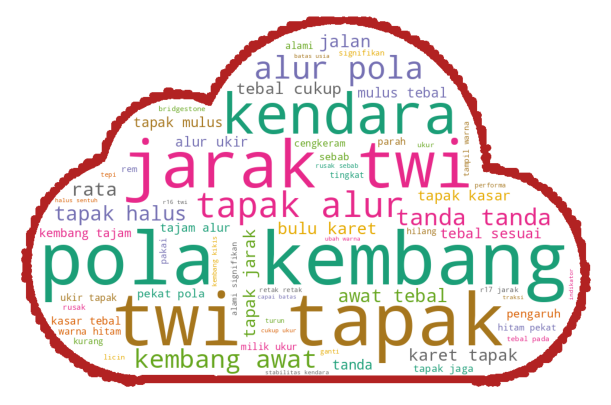

In [547]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Load mask image
cloud_mask = np.array(Image.open("cloud.jpg"))

wordcloud = WordCloud(width=1600, height=800, margin=10,
                      background_color='white', colormap='Dark2',
                      max_font_size=200, min_font_size=10,
                      mask=cloud_mask, contour_width=15, contour_color='firebrick',
                      max_words=130).generate(all_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [548]:
data = pd.read_csv('clean_data.csv')

In [549]:
filtered_data = data.loc[0:99, 'clean_teks']

In [550]:
aus_text = ' '.join(filtered_data.astype(str))

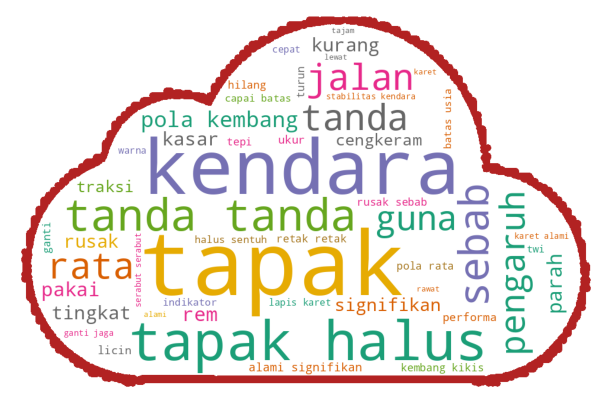

In [551]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Load mask image
cloud_mask = np.array(Image.open("cloud.jpg"))

wordcloud = WordCloud(width=1600, height=800, margin=10,
                      background_color='white', colormap='Dark2',
                      max_font_size=150, min_font_size=10,
                      mask=cloud_mask, contour_width=15, contour_color='firebrick',
                      max_words=50).generate(aus_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [552]:
data = pd.read_csv('clean_data.csv')

In [553]:
filtered_data = data.loc[100:199, 'clean_teks']

In [554]:
normal_text = ' '.join(filtered_data.astype(str))

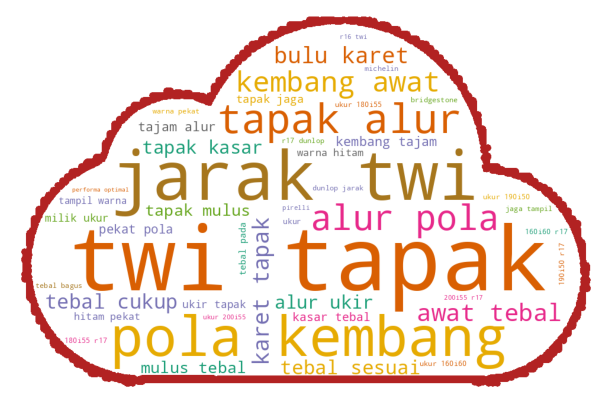

In [555]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Load mask image
cloud_mask = np.array(Image.open("cloud.jpg"))

wordcloud = WordCloud(width=1600, height=800, margin=10,
                      background_color='white', colormap='Dark2',
                      max_font_size=150, min_font_size=10,
                      mask=cloud_mask, contour_width=15, contour_color='firebrick',
                      max_words=80).generate(normal_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

BATAS WORDCLOUD

In [556]:
data = pd.read_csv('clean_data.csv')

In [557]:
data

,Unnamed: 0,Dokumen,Deskripsi,clean_teks
0,0,d1,Ban ini aus karena mengalami kerusakan dan sud...,alami rusak tipis retak sobek sebab guna tua c...
1,1,d2,Ban ini aus karena sudah dibawah panah twi dan...,bawah twi alami rusak parah sobek tekstur tapa...
2,2,d3,Ban ini menunjukkan tanda keausan yang signifi...,tanda signifikan pakai jalan jarak lewat kasar...
3,3,d4,Ban ini telah mencapai masa pakainya yang maks...,capai pakai maksimal tapak halus parah
4,4,d5,Ban tersebut terlihat aus dengan pola kembang ...,pola kembang kikis atur jalan basah cengkeram ...
...,...,...,...,...
195,195,d196,Ban ini berada dalam kondisi normal dengan uku...,ukur 195i65 r15 twi tapak kasar tebal sesuai
196,196,d197,Ban ini tetap normal dengan ukuran ban 215I60 ...,ukur 215i60 r16 twi tapak mulus tebal bagus
197,197,d198,Ban ini masih dalam kondisi normal dengan ukur...,ukur 185i55 r15 twi tapak kasar tebal cukup
198,198,d199,Ban ini dalam kondisi normal dan masih baru. T...,bulu karet tapak jarak twi tapak alur pola kem...


In [558]:
data.shape

(200, 4)

In [559]:
data.columns

Index(['Unnamed: 0', 'Dokumen', 'Deskripsi', 'clean_teks'], dtype='object')

In [560]:
data.drop(['Deskripsi', 'Unnamed: 0'], axis=1, inplace=True)

In [561]:
data

,Dokumen,clean_teks
0,d1,alami rusak tipis retak sobek sebab guna tua c...
1,d2,bawah twi alami rusak parah sobek tekstur tapa...
2,d3,tanda signifikan pakai jalan jarak lewat kasar...
3,d4,capai pakai maksimal tapak halus parah
4,d5,pola kembang kikis atur jalan basah cengkeram ...
...,...,...
195,d196,ukur 195i65 r15 twi tapak kasar tebal sesuai
196,d197,ukur 215i60 r16 twi tapak mulus tebal bagus
197,d198,ukur 185i55 r15 twi tapak kasar tebal cukup
198,d199,bulu karet tapak jarak twi tapak alur pola kem...


In [562]:
data.loc[0:99, 'Label'] = 'Ban Aus'
data.loc[100:199, 'Label'] = 'Ban Normal'

In [563]:
data

,Dokumen,clean_teks,Label
0,d1,alami rusak tipis retak sobek sebab guna tua c...,Ban Aus
1,d2,bawah twi alami rusak parah sobek tekstur tapa...,Ban Aus
2,d3,tanda signifikan pakai jalan jarak lewat kasar...,Ban Aus
3,d4,capai pakai maksimal tapak halus parah,Ban Aus
4,d5,pola kembang kikis atur jalan basah cengkeram ...,Ban Aus
...,...,...,...
195,d196,ukur 195i65 r15 twi tapak kasar tebal sesuai,Ban Normal
196,d197,ukur 215i60 r16 twi tapak mulus tebal bagus,Ban Normal
197,d198,ukur 185i55 r15 twi tapak kasar tebal cukup,Ban Normal
198,d199,bulu karet tapak jarak twi tapak alur pola kem...,Ban Normal


In [564]:
#simpan data agar tidak menjalankan proses ulang
data.to_csv('data_label.csv')

In [565]:
data = pd.read_csv('data_label.csv')

In [566]:
data

,Unnamed: 0,Dokumen,clean_teks,Label
0,0,d1,alami rusak tipis retak sobek sebab guna tua c...,Ban Aus
1,1,d2,bawah twi alami rusak parah sobek tekstur tapa...,Ban Aus
2,2,d3,tanda signifikan pakai jalan jarak lewat kasar...,Ban Aus
3,3,d4,capai pakai maksimal tapak halus parah,Ban Aus
4,4,d5,pola kembang kikis atur jalan basah cengkeram ...,Ban Aus
...,...,...,...,...
195,195,d196,ukur 195i65 r15 twi tapak kasar tebal sesuai,Ban Normal
196,196,d197,ukur 215i60 r16 twi tapak mulus tebal bagus,Ban Normal
197,197,d198,ukur 185i55 r15 twi tapak kasar tebal cukup,Ban Normal
198,198,d199,bulu karet tapak jarak twi tapak alur pola kem...,Ban Normal


In [567]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [568]:
data

,Dokumen,clean_teks,Label
0,d1,alami rusak tipis retak sobek sebab guna tua c...,Ban Aus
1,d2,bawah twi alami rusak parah sobek tekstur tapa...,Ban Aus
2,d3,tanda signifikan pakai jalan jarak lewat kasar...,Ban Aus
3,d4,capai pakai maksimal tapak halus parah,Ban Aus
4,d5,pola kembang kikis atur jalan basah cengkeram ...,Ban Aus
...,...,...,...
195,d196,ukur 195i65 r15 twi tapak kasar tebal sesuai,Ban Normal
196,d197,ukur 215i60 r16 twi tapak mulus tebal bagus,Ban Normal
197,d198,ukur 185i55 r15 twi tapak kasar tebal cukup,Ban Normal
198,d199,bulu karet tapak jarak twi tapak alur pola kem...,Ban Normal


In [569]:
from sklearn.preprocessing import LabelEncoder

#membuat label encoder
le = LabelEncoder()

#fitting label encoder pada kolom Sentiment
le.fit(data['Label'])

#menampilkan label encoder
print('Kelas Label:', le.classes_)

#transformasi kelas sentimen menjadi angka
data['Label'] = le.transform(data['Label'])

Kelas Label: ['Ban Aus' 'Ban Normal']


In [570]:
data

,Dokumen,clean_teks,Label
0,d1,alami rusak tipis retak sobek sebab guna tua c...,0
1,d2,bawah twi alami rusak parah sobek tekstur tapa...,0
2,d3,tanda signifikan pakai jalan jarak lewat kasar...,0
3,d4,capai pakai maksimal tapak halus parah,0
4,d5,pola kembang kikis atur jalan basah cengkeram ...,0
...,...,...,...
195,d196,ukur 195i65 r15 twi tapak kasar tebal sesuai,1
196,d197,ukur 215i60 r16 twi tapak mulus tebal bagus,1
197,d198,ukur 185i55 r15 twi tapak kasar tebal cukup,1
198,d199,bulu karet tapak jarak twi tapak alur pola kem...,1


In [571]:
print('Total Jumlah Deskripsi:', data.shape[0], 'data\n')
print('terdiri dari:')
print('-- [0] Ban Aus\t\t:', data[data.Label == 0].shape[0], 'data')
print('-- [1] Ban Normal\t:', data[data.Label == 1].shape[0], 'data')

Total Jumlah Deskripsi: 200 data

terdiri dari:
-- [0] Ban Aus		: 100 data
-- [1] Ban Normal	: 100 data


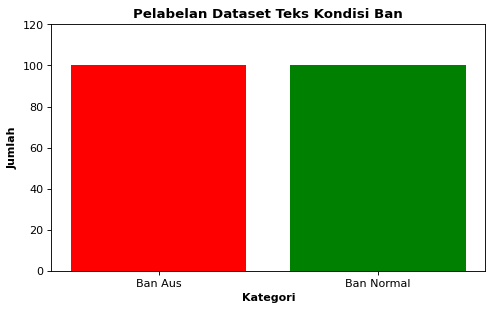

In [572]:
height = data['Label'].value_counts()
Labels = ('Ban Aus', 'Ban Normal')
y_pos = np.arange(len(Labels))

plt.figure(figsize=(7,4), dpi=80)
plt.ylim(0,120)
plt.title('Pelabelan Dataset Teks Kondisi Ban', fontweight='bold')
plt.xlabel('Kategori', fontweight='bold')
plt.ylabel('Jumlah', fontweight='bold')
plt.bar(y_pos, height, color=['red','green'])
plt.xticks(y_pos, Labels)
plt.show()

In [573]:
data = pd.read_csv('data_label.csv')

In [574]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [575]:
#dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(data['clean_teks'], data['Label'], test_size=0.2, random_state=42)

In [576]:
#ekstraksi fitur menggunakan TF-IDF
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [577]:
#melatih model SVM
model = SVC()
model.fit(X_train, y_train)

SVC()

In [578]:
# Teks baru yang akan diklasifikasikan
teks_baru = "Ban ini tebal warnanya juga hitam pekat"

clean_teksbaru = text_preprocessing_process(teks_baru)


In [579]:
# Ekstraksi fitur dari teks baru
teks_baru_vectorized = vectorizer.transform([teks_baru])

# Klasifikasikan teks baru
hasil_klasifikasi = model.predict(teks_baru_vectorized)

In [580]:
# hasil klasifikasi
if hasil_klasifikasi[0] == 'Ban Aus':
    print("Kondisi Ban Aus")
else:
    print("Kondisi Ban Normal")

Kondisi Ban Normal


In [581]:
data = pd.read_csv('data_label.csv')

In [582]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [583]:
from sklearn.preprocessing import LabelEncoder

#membuat label encoder
le = LabelEncoder()

#fitting label encoder pada kolom Sentiment
le.fit(data['Label'])

#menampilkan label encoder
print('Kelas Label:', le.classes_)

#transformasi kelas sentimen menjadi angka
data['Label'] = le.transform(data['Label'])

Kelas Label: ['Ban Aus' 'Ban Normal']


In [584]:
data

,Dokumen,clean_teks,Label
0,d1,alami rusak tipis retak sobek sebab guna tua c...,0
1,d2,bawah twi alami rusak parah sobek tekstur tapa...,0
2,d3,tanda signifikan pakai jalan jarak lewat kasar...,0
3,d4,capai pakai maksimal tapak halus parah,0
4,d5,pola kembang kikis atur jalan basah cengkeram ...,0
...,...,...,...
195,d196,ukur 195i65 r15 twi tapak kasar tebal sesuai,1
196,d197,ukur 215i60 r16 twi tapak mulus tebal bagus,1
197,d198,ukur 185i55 r15 twi tapak kasar tebal cukup,1
198,d199,bulu karet tapak jarak twi tapak alur pola kem...,1


In [585]:
#kolom fitur dan target

x = data['clean_teks']
y = data['Label']

In [586]:
x

0      alami rusak tipis retak sobek sebab guna tua c...
1      bawah twi alami rusak parah sobek tekstur tapa...
2      tanda signifikan pakai jalan jarak lewat kasar...
3                 capai pakai maksimal tapak halus parah
4      pola kembang kikis atur jalan basah cengkeram ...
                             ...                        
195         ukur 195i65 r15 twi tapak kasar tebal sesuai
196          ukur 215i60 r16 twi tapak mulus tebal bagus
197          ukur 185i55 r15 twi tapak kasar tebal cukup
198    bulu karet tapak jarak twi tapak alur pola kem...
199    bulu karet tapak jarak twi tapak alur pola kem...
Name: clean_teks, Length: 200, dtype: object

In [587]:
y

0      0
1      0
2      0
3      0
4      0
      ..
195    1
196    1
197    1
198    1
199    1
Name: Label, Length: 200, dtype: int64

In [588]:
#tfidf dan n-gram

from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer(ngram_range=(1,1))
tf_idf.fit(x)

TfidfVectorizer()

In [589]:
#jumlah fitur
print(len(tf_idf.get_feature_names_out()))

261


In [590]:
#fitur-fitur yang ada di dalam corpus
print(tf_idf.get_feature_names_out())

['150i70' '160i60' '170i60' '175i65' '180i55' '185i55' '185i60' '190i50'
 '195i50' '195i60' '195i65' '200i55' '205i50' '205i55' '215i60' '215i65'
 '225i40' '225i50' '225i55' '235i55' '265i70' 'abrasi' 'abu' 'abuan'
 'achilles' 'akibat' 'akumulasi' 'alami' 'alur' 'aman' 'andal' 'angin'
 'arah' 'area' 'asli' 'atur' 'awat' 'bagus' 'bahan' 'bahu' 'bakar'
 'banding' 'basah' 'batas' 'batu' 'bawah' 'beban' 'bekas' 'belok' 'benda'
 'bentuk' 'bentur' 'berat' 'bercak' 'bersih' 'besar' 'bfgoodrich' 'biasa'
 'bising' 'bocor' 'bridgestone' 'bulu' 'capai' 'cekung' 'celaka' 'cemar'
 'cengkeram' 'cepat' 'cokelat' 'coklat' 'colok' 'continental' 'cuaca'
 'cuat' 'cukup' 'dadak' 'dalam' 'deformasi' 'dunlop' 'efektif' 'efisiensi'
 'ekstrem' 'elastisitas' 'faktor' 'falken' 'gagal' 'ganggu' 'ganti'
 'gelap' 'gelincir' 'gelombang' 'gesek' 'goodyear' 'gores' 'grip'
 'gtradial' 'gulir' 'guna' 'hadap' 'halus' 'hankook' 'hilang' 'hitam'
 'ikat' 'imbang' 'indikasi' 'indikator' 'integritas' 'intensif' 'internal'
 '

In [591]:
#matriks jumlah token
#data ini siap untuk dimasukkan dalam proses pemodelan (machine learning)

x_tf_idf = tf_idf.transform(x).toarray()
x_tf_idf

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.18310636,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [592]:
#matriks jumlah token menggunakan tf idf, lihat perbedaan dengan bow
#data siap dimasukkan dalam proses pemodelan (machine learning)

data_tf_idf = pd.DataFrame(x_tf_idf, columns=tf_idf.get_feature_names_out())
data_tf_idf

,150i70,160i60,170i60,175i65,180i55,185i55,185i60,190i50,195i50,195i60,...,twi,ubah,udara,ukir,ukur,urai,usia,wajar,warna,yakin
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.120830,0.246399,0.0,0.0,0.000000,0.0,0.0,0.0,0.183106,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.221285,0.000000,0.0,0.0,0.261049,0.0,0.0,0.0,0.000000,0.0
196,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.204035,0.000000,0.0,0.0,0.240699,0.0,0.0,0.0,0.000000,0.0
197,0.0,0.0,0.0,0.0,0.0,0.590433,0.0,0.0,0.0,0.0,...,0.212420,0.000000,0.0,0.0,0.250590,0.0,0.0,0.0,0.000000,0.0
198,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.234540,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0


In [593]:
with open('tf_idf_feature.pickle', 'wb') as output:
  pickle.dump(x_tf_idf, output)

In [594]:
#mengubah nilai data tabular tf idf menjadi array aggar dapat dijalankan pada proses seleksi fitur

x = np.array(data_tf_idf)
y = np.array(y)

In [596]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#ten features with highest chi-squared statistics are selected
chi2_features = SelectKBest(chi2, k=261)
x_kbest_features = chi2_features.fit_transform(x,y)

#reduced features
print('Original feature number: ', x.shape[1])
print('Reduced feature number: ', x_kbest_features.shape[1])

Original feature number:  261
Reduced feature number:  261


In [597]:
#chi2_features.scores_ adalah nilai chi-square, semakin tinggi nilainya maka semakin baik fiturnya

data_chi2 = pd.DataFrame(chi2_features.scores_, columns=['nilai'])
data_chi2

,nilai
0,1.448377
1,3.137440
2,1.863350
3,0.395069
4,3.009504
...,...
256,0.461095
257,2.555340
258,0.678012
259,2.349619


In [598]:
#menampilkan fitur beserta nilainya

feature = tf_idf.get_feature_names_out()
data_chi2['fitur'] = feature
data_chi2

,nilai,fitur
0,1.448377,150i70
1,3.137440,160i60
2,1.863350,170i60
3,0.395069,175i65
4,3.009504,180i55
...,...,...
256,0.461095,urai
257,2.555340,usia
258,0.678012,wajar
259,2.349619,warna


In [599]:
#mengurutkan fitur terbaik

data_chi2.sort_values(by='nilai', ascending=False)

,nilai,fitur
238,14.531795,tebal
36,13.180525,awat
116,13.045404,jarak
28,11.634513,alur
235,10.645542,tanda
...,...,...
66,0.226476,cengkeram
252,0.121956,ubah
232,0.089369,tahan
199,0.042910,r18


In [600]:
#menampilkan mask pada feature yang diseleksi
#False berarti fitur tidak terpilih dan True berarti fitur terpilih

mask = chi2_features.get_support()
mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [601]:
#menampilkan fitur-fitur terpilih  berdasarkan mask atau nilai tertinggi yang sudah dikalkulasi padda Chi-square

new_feature = []

for bool, f in zip(mask, feature):
  if bool:
    new_feature.append(f)
  selected_feature = new_feature

In [602]:
selected_feature

['150i70',
 '160i60',
 '170i60',
 '175i65',
 '180i55',
 '185i55',
 '185i60',
 '190i50',
 '195i50',
 '195i60',
 '195i65',
 '200i55',
 '205i50',
 '205i55',
 '215i60',
 '215i65',
 '225i40',
 '225i50',
 '225i55',
 '235i55',
 '265i70',
 'abrasi',
 'abu',
 'abuan',
 'achilles',
 'akibat',
 'akumulasi',
 'alami',
 'alur',
 'aman',
 'andal',
 'angin',
 'arah',
 'area',
 'asli',
 'atur',
 'awat',
 'bagus',
 'bahan',
 'bahu',
 'bakar',
 'banding',
 'basah',
 'batas',
 'batu',
 'bawah',
 'beban',
 'bekas',
 'belok',
 'benda',
 'bentuk',
 'bentur',
 'berat',
 'bercak',
 'bersih',
 'besar',
 'bfgoodrich',
 'biasa',
 'bising',
 'bocor',
 'bridgestone',
 'bulu',
 'capai',
 'cekung',
 'celaka',
 'cemar',
 'cengkeram',
 'cepat',
 'cokelat',
 'coklat',
 'colok',
 'continental',
 'cuaca',
 'cuat',
 'cukup',
 'dadak',
 'dalam',
 'deformasi',
 'dunlop',
 'efektif',
 'efisiensi',
 'ekstrem',
 'elastisitas',
 'faktor',
 'falken',
 'gagal',
 'ganggu',
 'ganti',
 'gelap',
 'gelincir',
 'gelombang',
 'gesek',
 

In [603]:
#cara melihat vocab yang dihasilkan oleh tf idf
#tf_idf.vocabulary_

kbest_feature = {} #buat dictionary kosong

for(k,v) in tf_idf.vocabulary_.items():         #iterasi untuk mengulangi vocab yang dihasilkan tf_idf
  if k in selected_feature:                     #cek apakah fitur termasuk k fitur yang diseleksi
    kbest_feature[k] = v                        #jika iya, simpan fitur tersebut pada dictionary kosong diatas

In [604]:
kbest_feature

{'alami': 27,
 'rusak': 209,
 'tipis': 246,
 'retak': 205,
 'sobek': 223,
 'sebab': 211,
 'guna': 97,
 'tua': 249,
 'cuaca': 72,
 'panas': 175,
 'minim': 164,
 'rawat': 202,
 'bawah': 45,
 'twi': 251,
 'parah': 177,
 'tekstur': 240,
 'tapak': 237,
 'warna': 259,
 'ubah': 252,
 'pudar': 192,
 'tanda': 235,
 'intensif': 108,
 'kurang': 139,
 'signifikan': 219,
 'pakai': 174,
 'jalan': 114,
 'jarak': 116,
 'lewat': 149,
 'kasar': 120,
 'lapis': 144,
 'karet': 119,
 'kikis': 132,
 'pola': 189,
 'kembang': 122,
 'hilang': 101,
 'capai': 62,
 'maksimal': 158,
 'halus': 99,
 'atur': 35,
 'basah': 42,
 'cengkeram': 66,
 'turun': 250,
 'tingkat': 245,
 'risiko': 206,
 'gelincir': 89,
 'kendali': 124,
 'rata': 201,
 'ikat': 103,
 'ekstrem': 81,
 'kelupas': 121,
 'gores': 93,
 'pengaruh': 182,
 'performa': 184,
 'kendara': 125,
 'tahan': 232,
 'akumulasi': 26,
 'pecah': 179,
 'letus': 148,
 'tepi': 242,
 'akibat': 25,
 'ketidakstabilan': 131,
 'tajam': 233,
 'batu': 44,
 'lumpur': 157,
 'bekas': 

In [605]:
#menampilkan fitur-fitur yang sudah diseleksi
#beserta nilai vektornya pada keseluruhan data untuk dijalankan pada proses machine learning
#hanya k fitur yang terpilih sesuai parameter k yang ditentukan sebelumnya

data_selected_feature = pd.DataFrame(x_kbest_features, columns=selected_feature)
data_selected_feature

,150i70,160i60,170i60,175i65,180i55,185i55,185i60,190i50,195i50,195i60,...,twi,ubah,udara,ukir,ukur,urai,usia,wajar,warna,yakin
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.120830,0.246399,0.0,0.0,0.000000,0.0,0.0,0.0,0.183106,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.221285,0.000000,0.0,0.0,0.261049,0.0,0.0,0.0,0.000000,0.0
196,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.204035,0.000000,0.0,0.0,0.240699,0.0,0.0,0.0,0.000000,0.0
197,0.0,0.0,0.0,0.0,0.0,0.590433,0.0,0.0,0.0,0.0,...,0.212420,0.000000,0.0,0.0,0.250590,0.0,0.0,0.0,0.000000,0.0
198,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.234540,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0


In [606]:
with open('kbest_feature.pickle', 'wb') as output:
  pickle.dump(kbest_feature, output)

In [607]:
#SVM

from sklearn.svm import SVC                                   #mengimpor algoritma SVM
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split          #digunakan untuk memisahkan data uji dan data latih
from joblib import dump                                       #digunakan untuk menyimpan model yang telah dilatih

In [608]:
#proses memisahkan data uji dan data latih. perbandingan 80% untuk data latih, 20% untuk data uji
#random_state digunakan untuk internal random generator
#fitur (x) hasil seleksi fitur

x_train, x_test, y_train, y_test = train_test_split(x_kbest_features, y, test_size=0.3, random_state=42)

In [609]:
#membuat model svm

model1 =SVC(kernel='linear', C=1)

In [610]:
#melatih model svm

model1.fit(x_train, y_train)

SVC(C=1, kernel='linear')

In [611]:
#menyimpan model yang telah dilatih

dump(SVC, 'model1.joblib')

['model1.joblib']

In [612]:
#model yang telah dilatih untuk memprediksi label pada data uji

model_pred1 = model1.predict(x_test)

#hasil prediksi label dari model
model_pred1

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0])

In [620]:
# Teks baru yang akan diklasifikasikan
teks_baru = "Ban ini tipis banget ada sobekan dan retakannya"

clean_teksbaru = text_preprocessing_process(teks_baru)

In [621]:
# Ekstraksi fitur dari teks baru
teks_baru_vectorized = vectorizer.transform([teks_baru])

# Klasifikasikan teks baru
hasil_klasifikasi = model.predict(teks_baru_vectorized)

In [622]:
#hasil klasifikasi
if hasil_klasifikasi[0] == 'Ban Aus':
    print("Kondisi Ban Aus")
else:
    print("Kondisi Ban Normal")

Kondisi Ban Aus


In [623]:
#svm

#jumlah data yang berhasil diprediksi model dan jumlah data yang salah diprediksi

prediksi_benar = (model_pred1 == y_test).sum()
prediksi_salah = (model_pred1 != y_test).sum()

print('Jumlah prediksi benar\t:', prediksi_benar)
print('Jumlah prediksi salah\t:', prediksi_salah)

accuracy = prediksi_benar / (prediksi_benar + prediksi_salah)*100
print('Akurasi pengujian\t:', accuracy, '%')

Jumlah prediksi benar	: 60
Jumlah prediksi salah	: 0
Akurasi pengujian	: 100.0 %


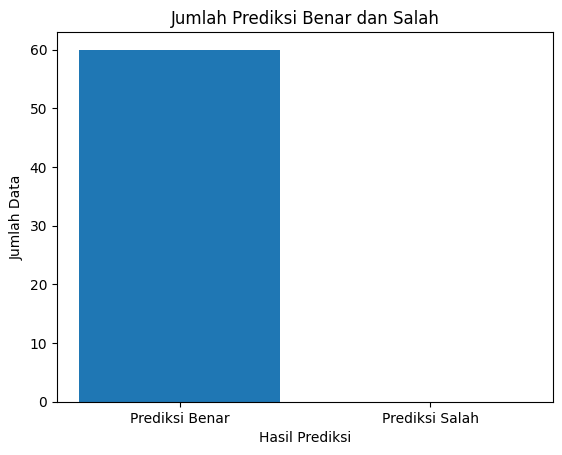

In [627]:
import matplotlib.pyplot as plt

prediksi_benar = (model_pred1 == y_test).sum()
prediksi_salah = (model_pred1 != y_test).sum()

labels = ['Prediksi Benar', 'Prediksi Salah']
jumlah_data = [prediksi_benar, prediksi_salah]

plt.bar(labels, jumlah_data)
plt.xlabel('Hasil Prediksi')
plt.ylabel('Jumlah Data')
plt.title('Jumlah Prediksi Benar dan Salah')

plt.show()

In [624]:
#svm
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, model_pred1)
print('Confusion matrix:\n', cm)

Confusion matrix:
 [[31  0]
 [ 0 29]]


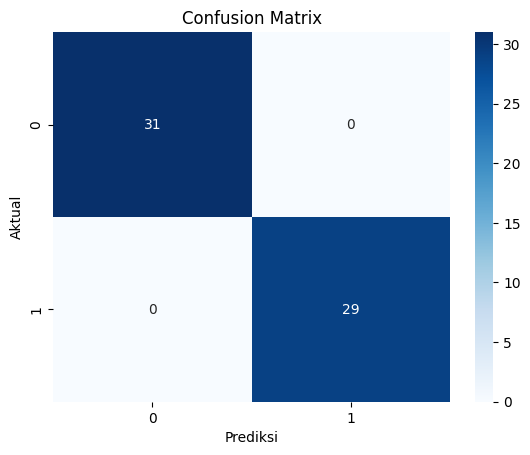

In [629]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, model_pred1)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')

plt.xlabel('Prediksi')
plt.ylabel('Aktual')

plt.title('Confusion Matrix')

plt.show()

In [625]:
#svm
from sklearn.metrics import classification_report

print('Classification report:\n', classification_report(y_test, model_pred1))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        29

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



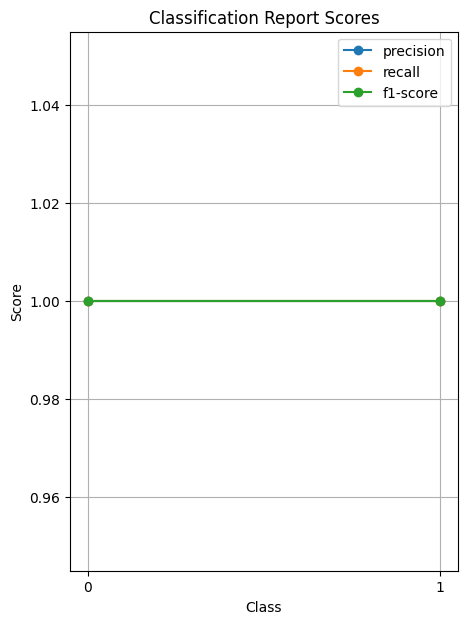

In [643]:
# Mengambil nilai precision, recall, f1-score dari classification report
scores = []
for line in report.split('\n')[2:-5]:
    scores.append([float(x) for x in line.strip().split()[1:]])

scores = np.array(scores)

#grafik
labels = ['precision', 'recall', 'f1-score', 'support']
target_names = ['0', '1']
plt.figure(figsize=(5, 7))
plt.plot(range(len(target_names)), scores[:, 0], marker='o', label='precision')
plt.plot(range(len(target_names)), scores[:, 1], marker='o', label='recall')
plt.plot(range(len(target_names)), scores[:, 2], marker='o', label='f1-score')
plt.xticks(range(len(target_names)), target_names)
plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Classification Report Scores')
plt.legend()
plt.grid(True)
plt.show()

In [626]:
#cross validation svm
from sklearn.model_selection import ShuffleSplit        #bisa pilih beberapa teknik cross validation
from sklearn.model_selection import cross_val_score     #untuk mengetahui performa model pada cross validation

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=50)

cv_accuracy = (cross_val_score(model1, x_kbest_features, y, cv=cv, scoring='accuracy'))
avg_accuracy = np.mean(cv_accuracy)

print('Akurasi setiap split:', cv_accuracy, '\n')
print('Rata-rata akurasi pada cross validation:', avg_accuracy)

Akurasi setiap split: [1.    1.    0.975 1.    0.975 1.    1.    0.95  1.    1.   ] 

Rata-rata akurasi pada cross validation: 0.99


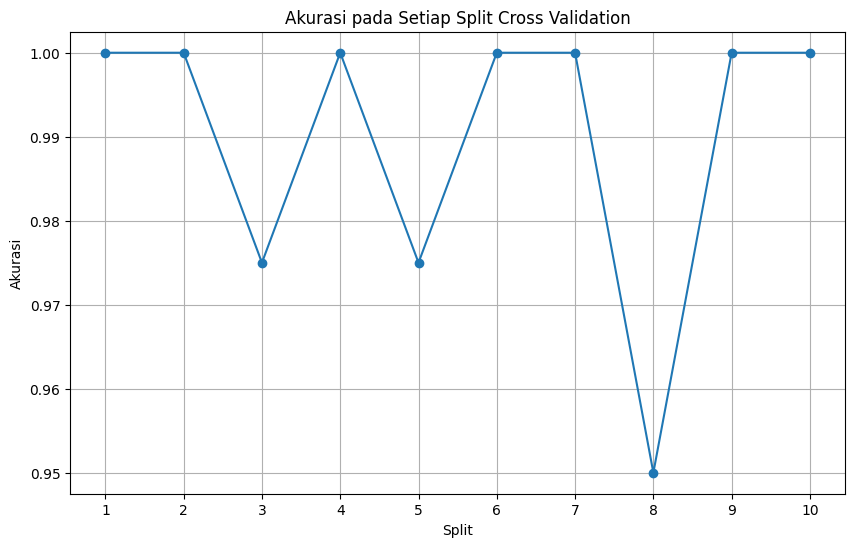

In [632]:
# grafik
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cv_accuracy)+1), cv_accuracy, marker='o')
plt.xlabel('Split')
plt.ylabel('Akurasi')
plt.title('Akurasi pada Setiap Split Cross Validation')
plt.xticks(range(1, len(cv_accuracy)+1))
plt.grid(True)
plt.show()